In [100]:
import torch
import torch.nn as nn
try:
    import torchviz
except ImportError:
    !pip install torchviz
    import torchviz
import matplotlib.pyplot as plt


In [101]:
curr_dtype = torch.float32
# x = torch.tensor([10, 20, 30, 40, 50], dtype=curr_dtype)
# y = torch.tensor([30, 30, 30, 30, 30], dtype=curr_dtype)

x = torch.tensor([1, 2, 3, 4, 5, 6, 7], dtype=curr_dtype)
y = torch.tensor([1.5, 3.8, 6.7, 9.0, 11.2, 13.6, 16], dtype=curr_dtype)

# x = torch.tensor([1, 2, 3, 4, 5, 6, 7], dtype=curr_dtype)
# y = torch.tensor([5, 2, 6, 3, 8, 4, 9], dtype=curr_dtype)

In [102]:
def plot_function(x,y, label:str='f(x)', **kwargs):

  fig = plt.figure(**kwargs)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  plt.xlabel("X axis", fontsize=20)
  plt.ylabel("Y axis", fontsize=20)    
  plt.plot(x,y, 'o', label='f(x)')

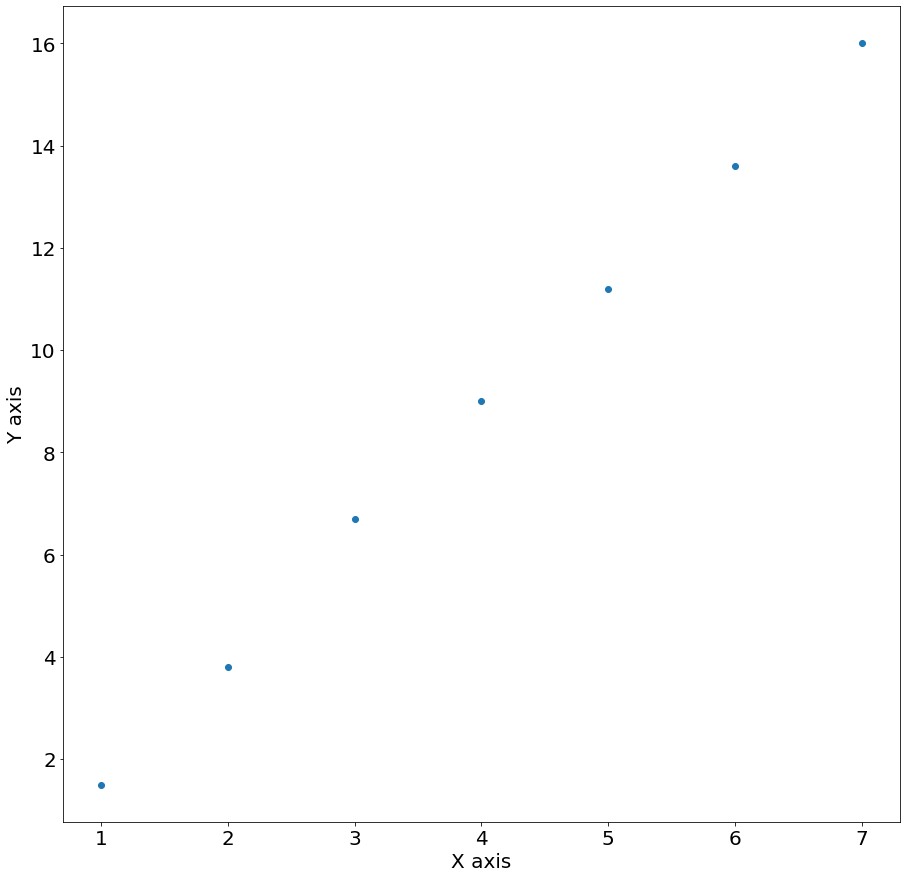

In [103]:
plot_function(x,y, figsize=(15,15))

In [104]:
x_mean = torch.mean(x)
y_mean = torch.mean(y)

In [105]:
print("X mean {0} | Y mean {1}".format(x_mean, y_mean))

X mean 4.0 | Y mean 8.828571319580078


In [106]:
def variance(x:torch.tensor, x_mean:torch.tensor):
  n = x.shape[0] - 1
  sum = torch.sum(torch.pow(torch.sub(x, x_mean), 2))
  return torch.div(sum, n)

In [107]:
variance(x, x_mean)

tensor(4.6667)

In [108]:
torch.var(x)

tensor(4.6667)

In [109]:
assert variance(x, x_mean) == torch.var(x), "Should be equal to one, defined in pytorch"

In [110]:
ab = torch.tensor([0,0], dtype=curr_dtype)

Prepare matrices

In [111]:
#inverse matrix
x_matrix = torch.tensor([
    [  torch.sum(torch.pow(x, 2)), torch.sum(x) ], # 0,0 | 0,1
    [  torch.sum(x), torch.ones(1)  ]  # 1,0 | 1,1
    ], dtype=curr_dtype)
x_matrix

tensor([[140.,  28.],
        [ 28.,   1.]])

In [112]:
det_x_matrix = (torch.sum(torch.pow(x, 2)) * torch.ones(1)) - (torch.pow(torch.sum(x), 2))
assert det_x_matrix != torch.zeros(1)

In [113]:
inv_matrix = torch.inverse(x_matrix)

In [114]:
#y matrix
y_matrix = torch.tensor([
    [  torch.sum(torch.mul(x, y)) ], # 0,0
    [  torch.sum(y) ]                # 1,0
    ], dtype=curr_dtype)
y_matrix

tensor([[314.8000],
        [ 61.8000]])

In [115]:
#find a and b coefficients y = ax + b
ab = torch.mm(inv_matrix, y_matrix)

In [116]:
ab

tensor([[2.1981],
        [0.2522]])

In [117]:
foo = ab[0] * x + ab[1]
foo

tensor([ 2.4503,  4.6484,  6.8466,  9.0447, 11.2429, 13.4410, 15.6391])

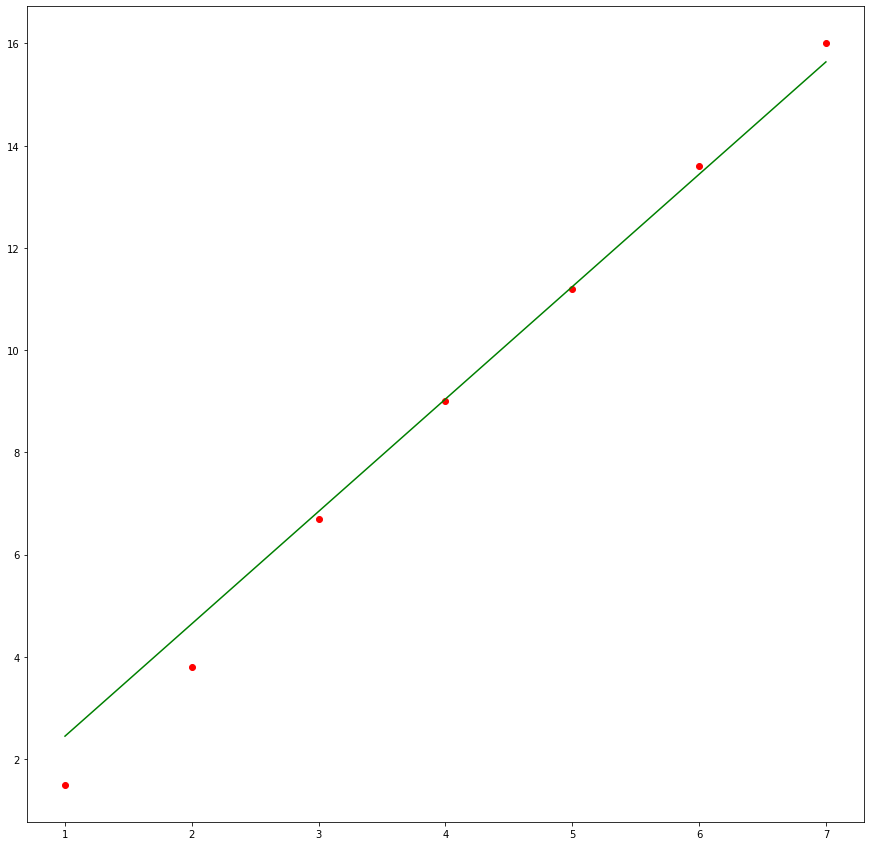

In [118]:
# Assign variables to the y axis part of the curve

plt.figure(figsize=(15,15))
# Plotting both the curves simultaneously
plt.scatter(x, y, color='r')
plt.plot(x, foo, color='g')
  
# To load the display window
plt.show()